## Business Question

1. What is the average number of bicycle users on weekdays compared to holidays?
2. How does temperature affect the number of daily bicycle users?

## Import Library

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Load the dataset
df = pd.read_csv('data/day.csv')

### Assessing Data

In [3]:
# Check five rows of the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# Check summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Check missing values in the dataset
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Check duplicated in the dataset
df.duplicated().sum()

np.int64(0)

In [7]:
# Check statistics of the dataset
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

In [8]:
# Changing the data type
df['dteday'] = pd.to_datetime(df['dteday'])

In [9]:
# Check summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

In [10]:
# Check statistics of the dataset
df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [11]:
# Check random sample of the dataset
df.sample()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
559,560,2012-07-13,3,1,7,0,5,1,2,0.731667,0.667933,0.485833,0.08085,1511,5988,7499


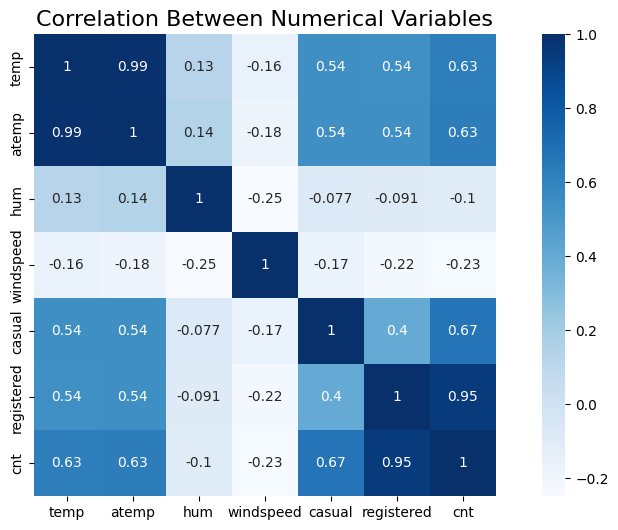

In [12]:
# Check correlation between numerical variables
correlation_values = df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_values, cbar=True, square=True, annot=True, annot_kws={'size': 10}, cmap='Blues')

plt.title('Correlation Between Numerical Variables', fontsize=16)
plt.show()

## Visualization & Explanatory Analysis

### 1. What is the average number of bicycle users on weekdays compared to holidays?

C:\Users\nurri\AppData\Local\Temp\ipykernel_24432\3846563832.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_df, x='Day Type', y='Average Users', palette=colors)


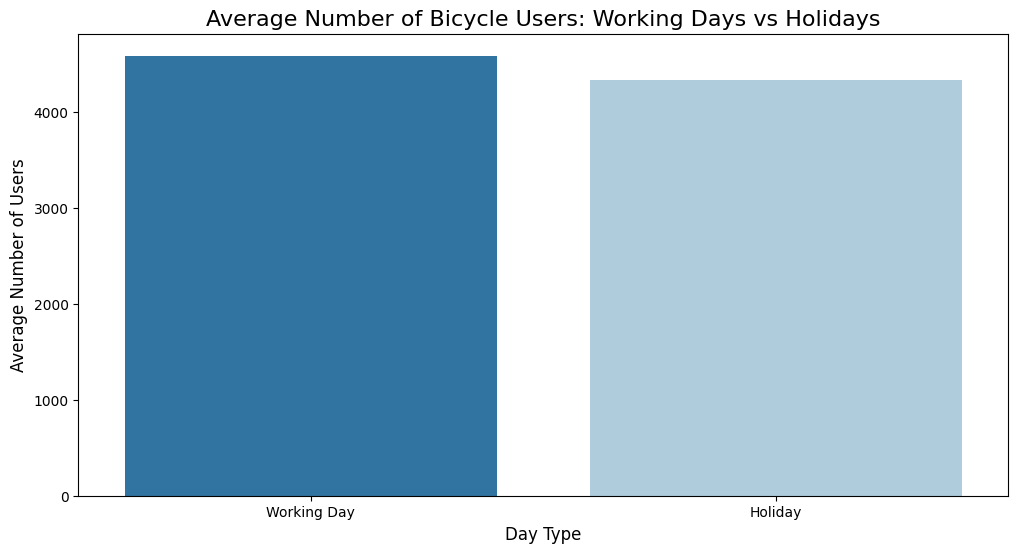

The average number of bicycle users on working days is 4585 people.
The average number of bicycle users on holidays is 4330 people.


In [13]:
# Answering the question 1
df['Day Type'] = df['workingday'].apply(lambda x: 'Working Day' if x == 1 else 'Holiday')

workingday_avg = round(df[df['workingday'] == 1]['cnt'].mean())
holiday_avg = round(df[df['workingday'] == 0]['cnt'].mean())

avg_df = pd.DataFrame({
    'Day Type': ['Working Day', 'Holiday'],
    'Average Users': [workingday_avg, holiday_avg]
})

colors = ['#1f77b4' if i == 0 else '#a6cee3' for i in range(len(avg_df))]

plt.figure(figsize=(12,6))
sns.barplot(data=avg_df, x='Day Type', y='Average Users', palette=colors)
plt.title('Average Number of Bicycle Users: Working Days vs Holidays', fontsize=16)
plt.ylabel('Average Number of Users', fontsize=12)
plt.xlabel('Day Type', fontsize=12)
plt.show()

print(f"The average number of bicycle users on working days is {workingday_avg} people.")
print(f"The average number of bicycle users on holidays is {holiday_avg} people.")

### 2. How does temperature affect the number of daily bicycle users?

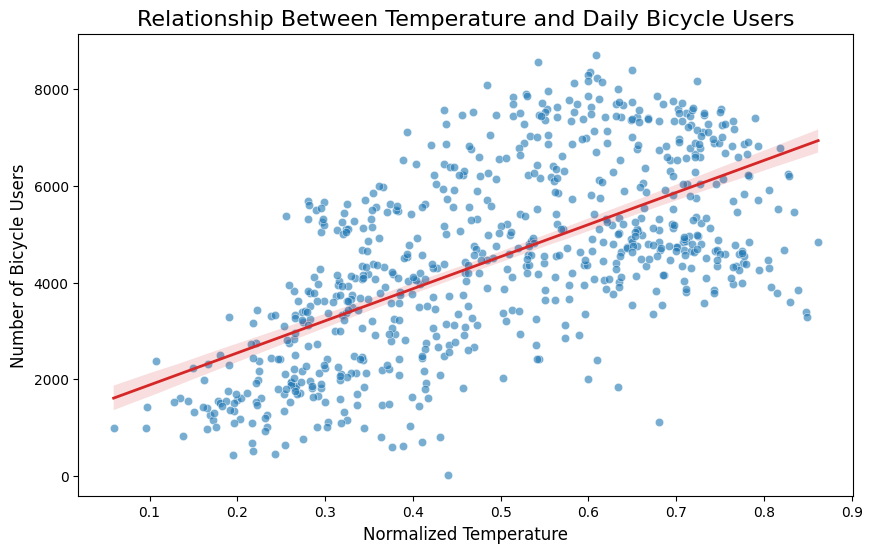

In [14]:
# Answering the question 2
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='temp', y='cnt', color='#1f77b4', alpha=0.6)  # biru untuk titik
sns.regplot(data=df, x='temp', y='cnt', scatter=False, color='#d62728', line_kws={'linewidth':2})  # merah untuk garis tren

plt.title('Relationship Between Temperature and Daily Bicycle Users', fontsize=16)
plt.xlabel('Normalized Temperature', fontsize=12)
plt.ylabel('Number of Bicycle Users', fontsize=12)
plt.show()

## Conclusion

1. Conclution question 1
- There are more bicycle users on weekdays than holidays, indicating that bicycles are used as a means of transportation for routine activities such as work or school.
2.  Conclution question 2
- The number of daily bicycle users increases as the temperature rises, suggesting that warmer weather encourages more people to cycle.

## Save Dataset

In [15]:
df.to_csv("dashboard/cleaned_dataset.csv", index=False)